# Electric Vehicle Analysis:
This project focuses on analyzing the registration data of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) in Washington State, aiming to uncover trends, patterns, and adoption dynamics to gain insights into the growth and development of sustainable transportation.

### Problem Statement:
*Conduct a Data Analysis on Electric Vehicles using the provided dataset to uncover insights.*

#### Task 1:
> Perform Exploratory Data Analysis (EDA), including both Univariate and Bivariate analyses, to explore patterns and trends within the dataset.

#### Task 2:
> Create a Choropleth map using Plotly Express to visualize the distribution of electric vehicles based on location.

#### Task 3:
> Develop a Racing Bar Plot to animate the changes in the number of electric vehicle makes over the years.

In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# load the dataset
PATH = r'/content/drive/MyDrive/Colab Notebooks/data/ev_dataset.csv'
ev_df = pd.read_csv(PATH)

In [ ]:
# Overview of the dataset
ev_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [ ]:
ev_df.shape

(112634, 17)

In [ ]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [ ]:
ev_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,112634.0,9.815623e+04,2.648733e+03,1.730000e+03,9.805200e+04,9.811900e+04,9.837000e+04,9.970100e+04
Model Year,112634.0,2.019003e+03,2.892364e+00,1.997000e+03,2.017000e+03,2.020000e+03,2.022000e+03,2.023000e+03
Electric Range,112634.0,8.781299e+01,1.023342e+02,0.000000e+00,0.000000e+00,3.200000e+01,2.080000e+02,3.370000e+02
Base MSRP,112634.0,1.793440e+03,1.078375e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,112348.0,2.980560e+01,1.470055e+01,1.000000e+00,1.800000e+01,3.400000e+01,4.300000e+01,4.900000e+01
DOL Vehicle ID,112634.0,1.994567e+08,9.398427e+07,4.777000e+03,1.484142e+08,1.923896e+08,2.191899e+08,4.792548e+08
2020 Census Tract,112634.0,5.296650e+10,1.699104e+09,1.101001e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.603300e+10


In [ ]:
ev_df.isna().sum().sort_values(ascending=False)

,0
Electric Utility,443
Legislative District,286
Vehicle Location,24
Model,20
VIN (1-10),0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
DOL Vehicle ID,0
Base MSRP,0
Electric Range,0
Electric Vehicle Type,0


## Data Cleaning

In [ ]:
## Copy the dataset
df = ev_df.copy()

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
Electric Utility,443
Legislative District,286
Vehicle Location,24
Model,20
VIN (1-10),0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
DOL Vehicle ID,0
Base MSRP,0
Electric Range,0
Electric Vehicle Type,0


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
VIN (1-10),0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Utility,0
Vehicle Location,0
DOL Vehicle ID,0
Legislative District,0
Base MSRP,0
Electric Range,0
Electric Vehicle Type,0
County,0


In [ ]:
df.shape

(112152, 17)

In [ ]:
total_rows = ev_df.shape[0]
rows_after_removal = df.shape[0]
removed_rows = total_rows - rows_after_removal

removed_rows_percentage = (removed_rows / total_rows) * 100

print(f"Total rows              :: {total_rows}")
print(f"Rows after removal      :: {rows_after_removal}")
print(f"Removed rows            :: {removed_rows}")
print(f"Removed rows percentage :: {removed_rows_percentage:.3f} %")

Total rows              :: 112634
Rows after removal      :: 112152
Removed rows            :: 482
Removed rows percentage :: 0.428 %


In [ ]:
# Checking for duplicates in the dataset
df.duplicated().sum()

0

In [ ]:
# Convert columns like 'Model Year' to numerical and 'Postal Code' to strings if necessary
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')
df['Postal Code'] = df['Postal Code'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112152 entries, 0 to 112151
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112152 non-null  object 
 1   County                                             112152 non-null  object 
 2   City                                               112152 non-null  object 
 3   State                                              112152 non-null  object 
 4   Postal Code                                        112152 non-null  object 
 5   Model Year                                         112152 non-null  int64  
 6   Make                                               112152 non-null  object 
 7   Model                                              112152 non-null  object 
 8   Electric Vehicle Type                              112152 non-null  object

In [ ]:
# Drop irrelevant columns for analysis (e.g., VIN, DOL Vehicle ID)
df.drop(columns=['VIN (1-10)', 'DOL Vehicle ID'], inplace=True)

In [ ]:
# Inspect the cleaned data
print(df.info())
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112152 entries, 0 to 112151
Data columns (total 15 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             112152 non-null  object 
 1   City                                               112152 non-null  object 
 2   State                                              112152 non-null  object 
 3   Postal Code                                        112152 non-null  object 
 4   Model Year                                         112152 non-null  int64  
 5   Make                                               112152 non-null  object 
 6   Model                                              112152 non-null  object 
 7   Electric Vehicle Type                              112152 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  112152 non-null  object

## Univariate Analysis


### Analyzing the Numerical Columns

In [ ]:
# Analysing the numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

def univariate_analysis_numeric(df:pd.DataFrame) -> None:
  for col_name in df:
    print("*"*10, col_name, "*"*10)
    print(df[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
    print()

univariate_analysis_numeric(numerical_df)

********** Model Year **********
min       1997.000000
max       2023.000000
mean      2019.004494
median    2020.000000
std          2.891859
Name: Model Year, dtype: float64

********** Electric Range **********
min         0.000000
max       337.000000
mean       87.829651
median     32.000000
std       102.336645
Name: Electric Range, dtype: float64

********** Base MSRP **********
min            0.000000
max       845000.000000
mean        1793.882320
median         0.000000
std        10785.259118
Name: Base MSRP, dtype: float64

********** Legislative District **********
min        1.000000
max       49.000000
mean      29.817703
median    34.000000
std       14.698726
Name: Legislative District, dtype: float64

********** 2020 Census Tract **********
min       5.300195e+10
max       5.307794e+10
mean      5.303958e+10
median    5.303303e+10
std       1.617788e+07
Name: 2020 Census Tract, dtype: float64



### Visualization of numeric columns -
- To understand how the data is distributed can be effectively visualized using a box plot.
- It displays the spread of data, highlighting the median, quartiles, and potential outliers, making it a great choice for summarizing distributions in a single plot.

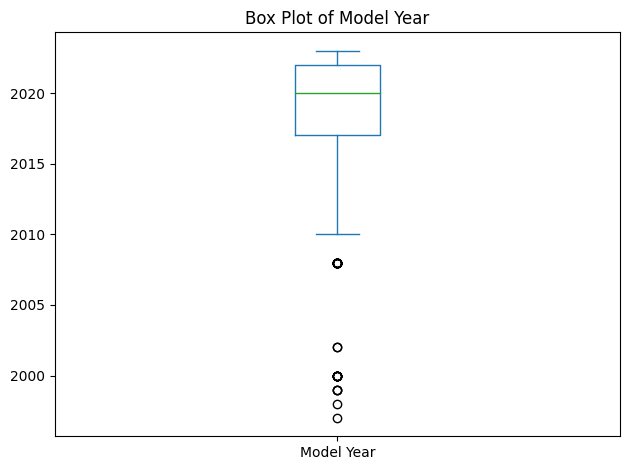

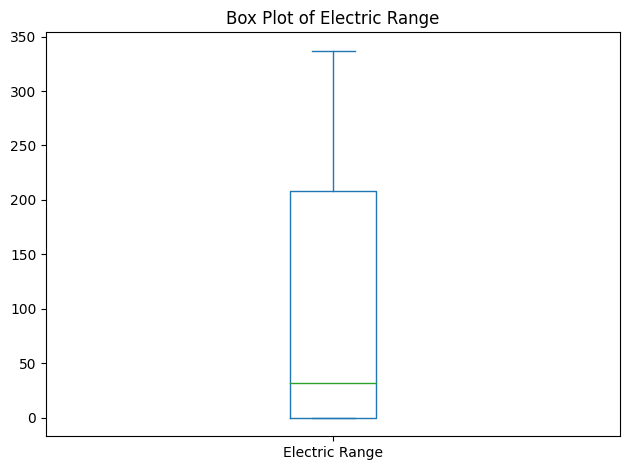

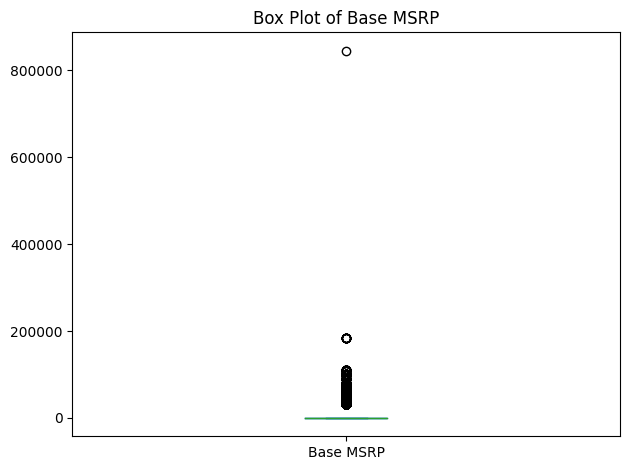

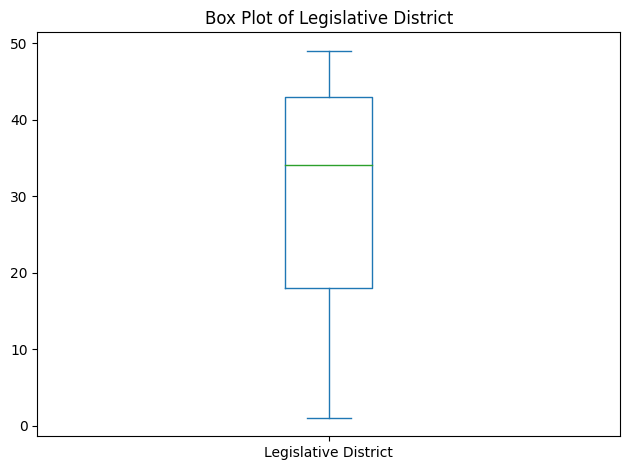

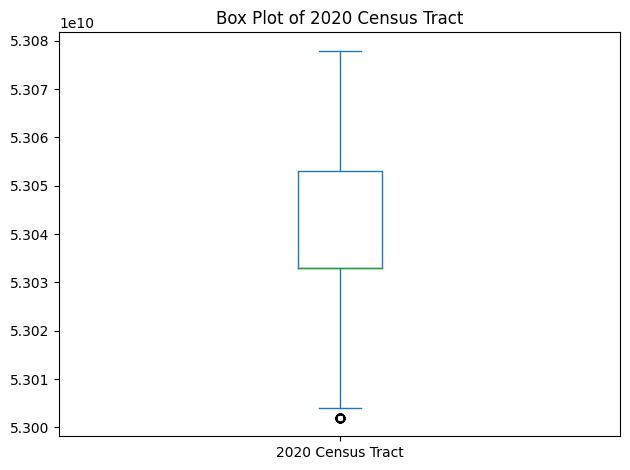

In [ ]:
def numerical_df_visualization(numeric_data):
    for col in numeric_data.columns:
        numeric_data[col].plot(kind="box")
        plt.title(f"Box Plot of {col}")
        plt.tight_layout()
        plt.show()


numerical_df_visualization(numerical_df)

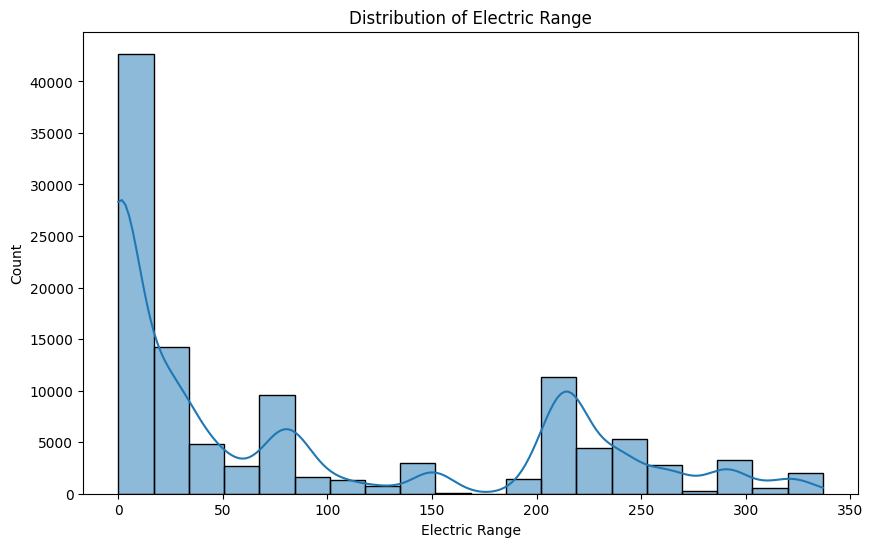

In [ ]:
# Univariate Analysis of Numerical Columns
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=20, kde=True)
plt.title('Distribution of Electric Range')
plt.show()

### Insight:
- Most vehicles have a range of 0-50 miles, indicating limited electric-only driving capability.
- Popular electric ranges are around 50, 100, and 200 miles, reflecting different vehicle tiers.
- A smaller number of vehicles exceed 200 miles on a single charge.
- The distribution is right-skewed, with most vehicles concentrated in the lower range.

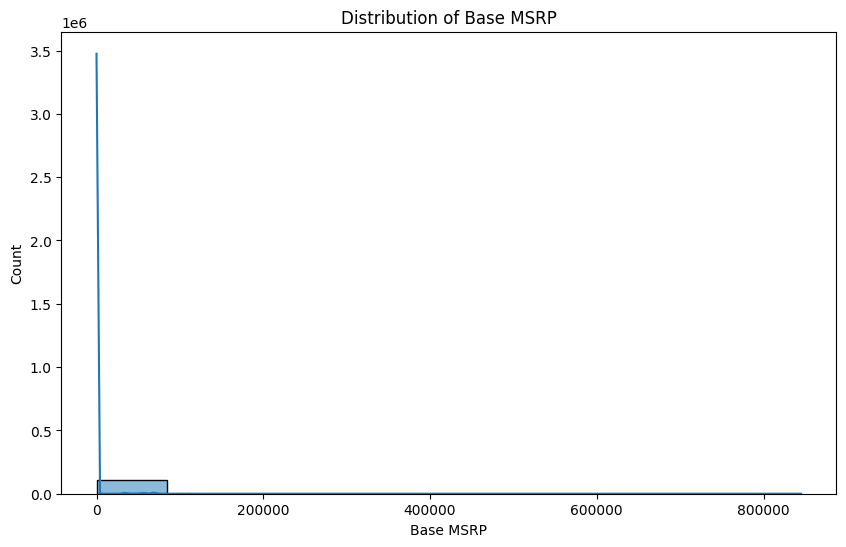

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Base MSRP'], bins=10, kde=True)
plt.title('Distribution of Base MSRP')
plt.show()

### Insight :
- The graph shows the distribution of Base MSRP, which is heavily right-skewed with most values concentrated at lower prices.
- There are extreme outliers extending beyond $800,000.

- But, the majority of vehicles are likely priced below $50,000, though exact details are hard to see due to the wide scale.

Therefore, we have to transform the data (e.g., log transformation) to better visualize the distribution.

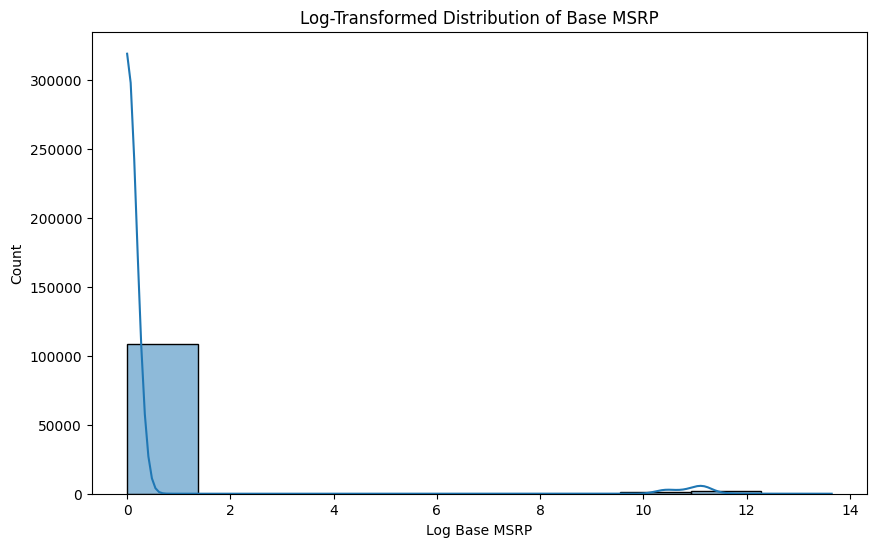

In [ ]:
# Apply log transformation (use np.log1p to handle zeros)
df['Log Base MSRP'] = np.log1p(df['Base MSRP'])

# Plot the log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(df['Log Base MSRP'], bins=10, kde=True)
plt.title('Log-Transformed Distribution of Base MSRP')
plt.show()

### Insights :
- Most values remain concentrated in the lower MSRP range, as indicated by the sharp decline in count at the lower end of the log scale.

### Analyzing the Categorical columns

In [ ]:
categorical_df = ev_df.select_dtypes(include='object')

In [ ]:
categorical_df.head()

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,JTMEB3FV6N,Monroe,Key West,FL,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-81.80023 24.5545),NaN
1,1G1RD6E45D,Clark,Laughlin,NV,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-114.57245 35.16815),NaN
2,JN1AZ0CP8B,Yakima,Yakima,WA,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-120.50721 46.60448),PACIFICORP
3,1G1FW6S08H,Skagit,Concrete,WA,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC
4,3FA6P0SU1K,Snohomish,Everett,WA,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC


In [ ]:
def categorical_univariate_analysis(cat_data):
    for i in cat_data:
        print("*"*10, i ,"*"*10)
        print("Unique values:",cat_data[i].unique())
        print("Nunique values:",cat_data[i].nunique())
        print("--------------------------------------------------------")

categorical_univariate_analysis(categorical_df)

********** VIN (1-10) **********
Unique values: ['JTMEB3FV6N' '1G1RD6E45D' 'JN1AZ0CP8B' ... 'KMHE14L25K' 'WA1LAAGE5M'
 'YV4ED3GM0P']
Nunique values: 7548
--------------------------------------------------------
********** County **********
Unique values: ['Monroe' 'Clark' 'Yakima' 'Skagit' 'Snohomish' 'Island' 'Thurston'
 'Grant' 'St. Clair' 'Pierce' 'Saratoga' 'Stevens' 'King' 'Kitsap'
 'Newport News' 'Jackson' 'Whitman' 'Lake' 'Spokane' 'Clallam' 'Cowlitz'
 'Kittitas' 'Grays Harbor' 'Chelan' 'Whatcom' 'Benton' 'Walla Walla'
 'Mason' 'San Juan' 'Lewis' 'Jefferson' 'Douglas' 'Klickitat' 'Geary'
 'Skamania' 'Fairfax' 'Adams' 'Franklin' 'Okanogan' 'Sonoma' 'Asotin'
 'Ferry' 'Pacific' 'Riverside' 'Orange' 'Columbia' 'Wahkiakum'
 'Leavenworth' 'Contra Costa' 'Howard' 'Larimer' 'District of Columbia'
 'Washington' 'Tipton' 'San Diego' 'Sumter' "Prince George's" 'New Haven'
 'Lincoln' 'Las Animas' 'Frederick' 'Hidalgo' 'Pend Oreille' 'Bexar'
 'Garfield' 'Pennington' 'Honolulu' 'Anne Arundel'

In [ ]:
# All of the categorical data columns
print(categorical_df.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')


Unique Makes  : 34
Unique Models : 114


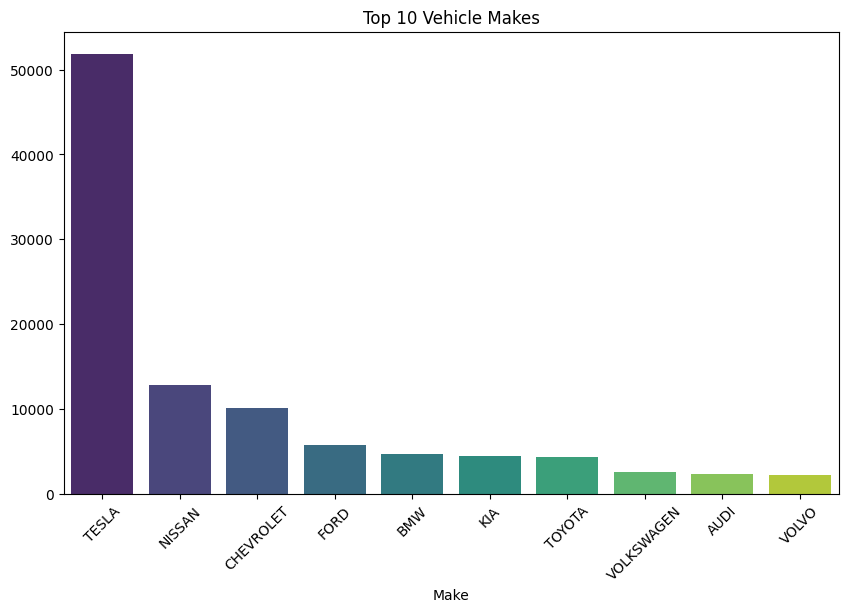

In [ ]:
# Analyze unique counts for categorical columns
print("Unique Makes  :", df['Make'].nunique())
print("Unique Models :", df['Model'].nunique())

# Top 10 most common vehicle makes
top_makes = df['Make'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.index, y=top_makes.values,palette='viridis')
plt.title('Top 10 Vehicle Makes')
plt.xticks(rotation=45)
plt.show()

#### Question : Which county has the highest population?

In [ ]:
top_10_counties = df["County"].value_counts().sort_values(ascending=False).head(10)

print("*"*5, "Top 10 Counties", "*"*5)
for county, count in top_10_counties.items():
  print("{0} : {1}".format(county, count))

***** Top 10 Counties *****
King : 58980
Snohomish : 12412
Pierce : 8525
Clark : 6681
Thurston : 4109
Kitsap : 3828
Whatcom : 2839
Spokane : 2785
Benton : 1376
Island : 1298


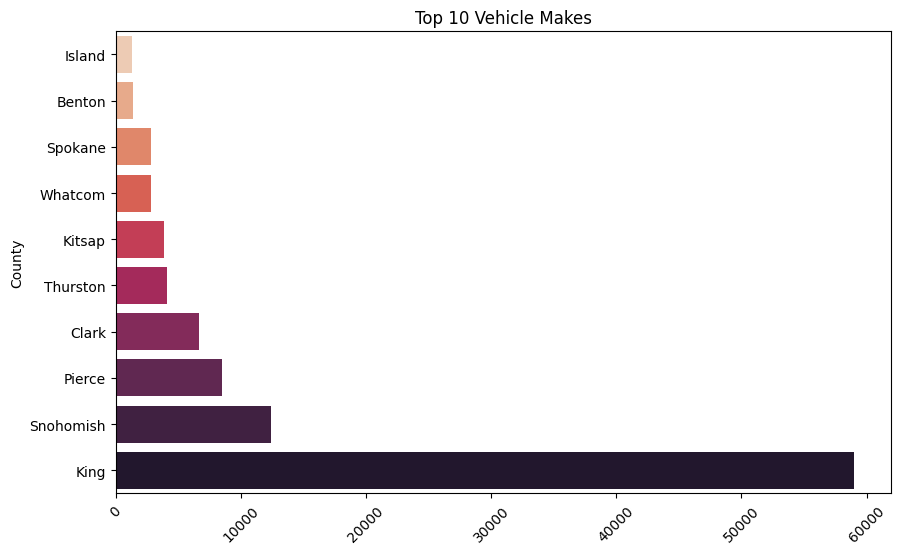

In [ ]:
top_10_counties_sorted = top_10_counties.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=top_10_counties_sorted.index, x=top_10_counties_sorted.values, palette='rocket_r')
plt.title('Top 10 Vehicle Makes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df["City"].value_counts().sort_values(ascending=False).head(10)
# df["Model"].value_counts()
# df["Electric Vehicle Type"].value_counts().plot(kind = "barh")
# df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts().plot(kind = "barh")

,count
City,
Seattle,20295
Bellevue,5919
Redmond,4199
Vancouver,4013
Kirkland,3598
Bothell,3334
Sammamish,3291
Renton,2777
Olympia,2729


#### Question:
How does the popularity of electric car models compare, and what trends can be observed from the high sales of the Model 3 and Model Y versus the lower sales of models like the i3 and Niro?

<Axes: ylabel='Model'>

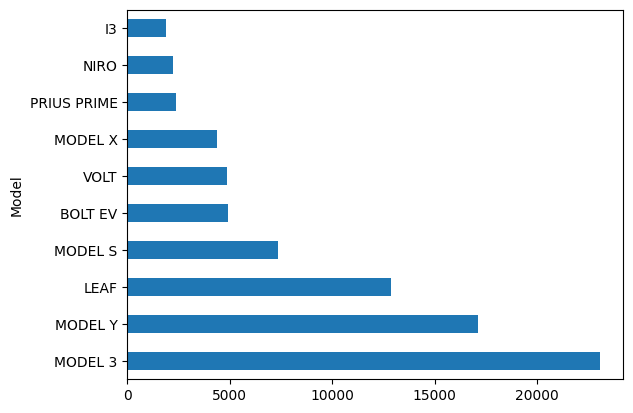

In [ ]:
df["Model"].value_counts().head(10).plot(kind = "barh")

#### Insight:
- The popularity of different electric car models.
- The most popular model is the Model 3, followed by the Model Y.
- The least popular models are the i3 and Niro.
- The overall popularity of electric cars seems to be increasing, as evidenced by the relatively high sales of the Model 3 and Model Y.


#### Question:
What does the distribution of electric vehicle types reveal about consumer preferences, given the higher popularity of Battery Electric Vehicles (BEV) compared to Plug-in Hybrid Electric Vehicles (PHEV), and how might factors like range and operating costs influence this trend?

<Axes: ylabel='Electric Vehicle Type'>

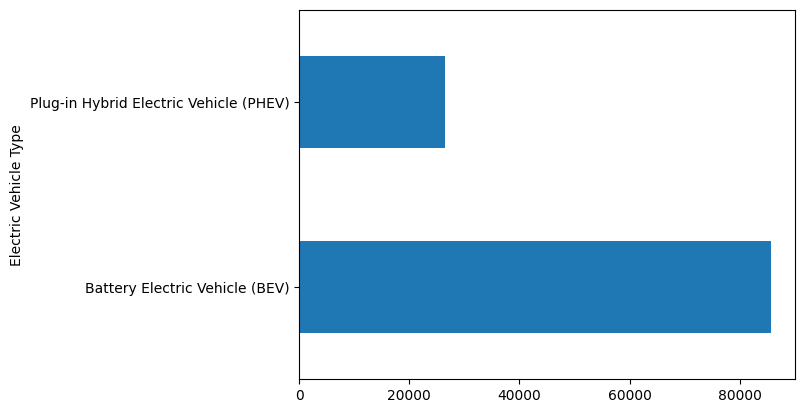

In [ ]:
df["Electric Vehicle Type"].value_counts().plot(kind = "barh")

#### Insights:
- The distribution of electric vehicle types.
- The majority of electric vehicles are Battery Electric Vehicles (BEV), while a smaller portion are Plug-in Hybrid Electric Vehicles (PHEV).
- This suggests that BEVs are currently more popular among consumers, potentially due to factors such as longer range and lower operating costs.

#### Question:
How does the eligibility of electric vehicles for Clean Alternative Fuel Vehicle (CAFV) incentives vary, and what role does limited battery range and lack of research play in determining eligibility?

<Axes: ylabel='Clean Alternative Fuel Vehicle (CAFV) Eligibility'>

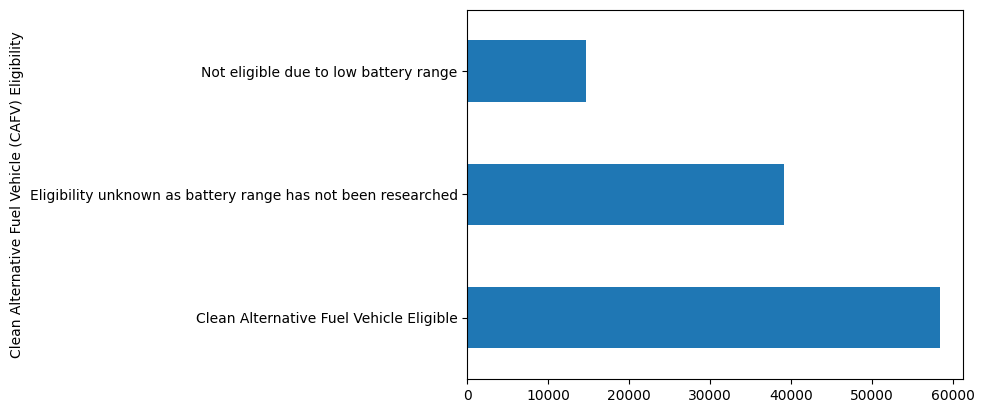

In [ ]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts().plot(kind = "barh")

#### Insights:
- The eligibility of different electric vehicles for Clean Alternative Fuel Vehicle (CAFV) incentives.

- The majority of vehicles are eligible, while some are ineligible due to low battery range.

- A significant number of vehicles have not been researched for battery range, and their eligibility is therefore unknown.

- This suggests that there is a need for more information on electric vehicle battery ranges to determine their eligibility for CAFV incentives.

## Bivariate Analysis

In [ ]:
# Categorical vs Categorical
correlation = ev_df['Electric Range'].corr(ev_df['Model Year'])
print("Pearson Correlation Coefficient between 'Electric Range' and 'Model Year':{:.2f}".format(correlation))

Pearson Correlation Coefficient between 'Electric Range' and 'Model Year':-0.29


In [ ]:
correlation = ev_df['Electric Range'].corr(ev_df['Base MSRP'])

print("Pearson Correlation Coefficient between 'Electric Range' and 'Model Year':{:.2f}".format(correlation))

Pearson Correlation Coefficient between 'Electric Range' and 'Model Year':0.09


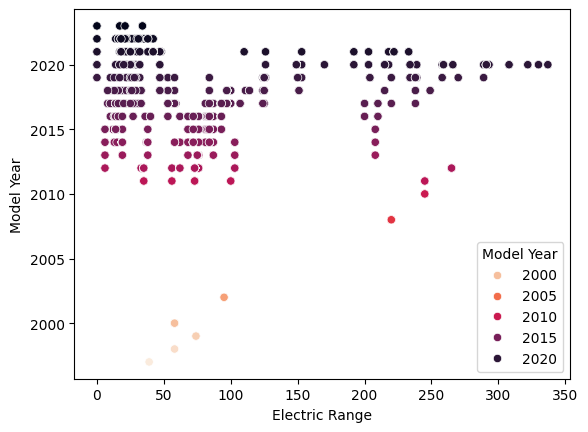

In [ ]:
sns.scatterplot(df,x= df["Electric Range"],y=df["Model Year"],hue=df["Model Year"], palette='rocket_r')
plt.show()

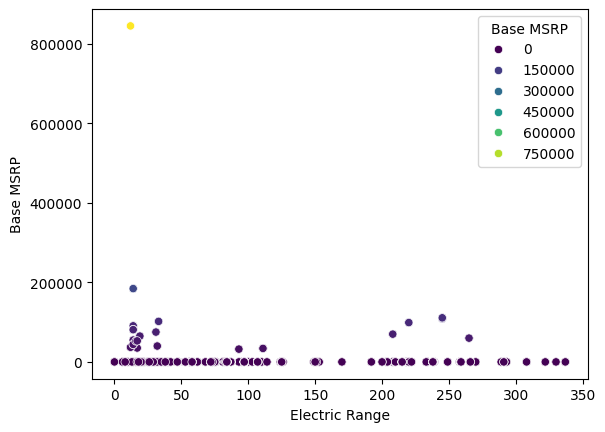

In [ ]:
sns.scatterplot(df,x=df["Electric Range"],y = df["Base MSRP"],hue = df["Base MSRP"], palette='viridis')
plt.show()

In [ ]:
# Categorical Vs Numerical
df.groupby(by = "Make")["Model Year"].value_counts()

Make   Model Year
AUDI   2022          584
       2021          542
       2019          387
       2020          224
       2016          214
                    ... 
VOLVO  2019          190
       2020          162
       2017          115
       2016          112
       2023            1
Name: count, Length: 209, dtype: int64

In [ ]:
df.groupby(by = "Make")["Electric Range"].mean().head(10)

,Electric Range
Make,
AUDI,62.628448
AZURE DYNAMICS,56.000000
BENTLEY,18.666667
BMW,46.681545
CADILLAC,35.537037
CHEVROLET,109.862032
CHRYSLER,32.360674
FIAT,85.628049
FISKER,33.000000


In [ ]:
df.groupby(by = ["Make","County"])["Model Year"].value_counts()

Make   County   Model Year
AUDI   Adams    2017           1
       Benton   2022          16
                2021           7
                2017           2
                2019           1
                              ..
VOLVO  Whitman  2022           1
       Yakima   2022           4
                2021           3
                2018           2
                2016           1
Name: count, Length: 3749, dtype: int64

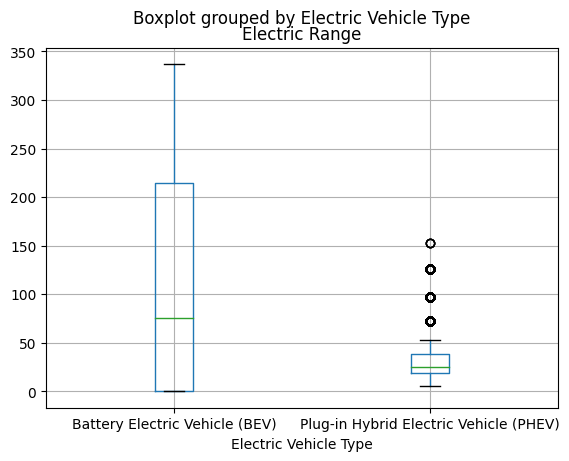

In [ ]:
df.boxplot(column="Electric Range", by = "Electric Vehicle Type")#figsize = (8,6))
plt.show()

In [ ]:
# Categorical Vs Categorical
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle Location,Electric Utility,2020 Census Tract,Log Base MSRP
0,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,POINT (-120.50721 46.60448),PACIFICORP,53077001602,0.0
1,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101,0.0
2,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500,0.0
3,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916,0.0
4,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900,0.0


In [ ]:
cross_tab = pd.crosstab(df["Make"],df["County"]).count()
cross_tab

,0
County,
Adams,34
Asotin,34
Benton,34
Chelan,34
Clallam,34
Clark,34
Columbia,34
Cowlitz,34
Douglas,34


In [ ]:
grouped_df = df.groupby(by=["Make", "Model"])


pd.crosstab(index=df["County"], columns=[df["Make"], df["Model"]])

Make         AUDI                                                         \
Model          A3 A7 A8 E E-TRON E-TRON GT E-TRON SPORTBACK  Q4  Q5 Q5 E   
County                                                                     
Adams           1  0    0      0         0                0   0   0    0   
Asotin          0  0    0      0         0                0   0   0    0   
Benton          2  0    0     10         0                4   2   5    4   
Chelan          3  0    0      5         0                0   1   0    2   
Clallam         1  0    0      2         0                0   0   0    1   
Clark          16  0    0     46         4                9   3   6   24   
Columbia        0  0    0      0         0                0   0   0    0   
Cowlitz         2  0    0      1         0                1   0   0    3   
Douglas         0  0    0      1         0                0   0   0    1   
Ferry           0  0    0      0         0                0   0   0    0   
Franklin        0  0    0      1         0                2   0   0    2   
Garfield        0  0    0      0         0                0   0   0    0   
Grant           0  0    0      1         0                0   0   0    1   
Grays Harbor    1  0    0      0         0                0   0   1    0   
Island          8  1    0     10         4                1   0   1    7   
Jefferson       3  0    0      0         0                0   0   0    4   
King          372  4    2    484        48              101  32  78  277   
Kitsap         26  1    0     20         2                4   3   6   22   
Kittitas        0  0    0      5         0                0   0   2    2   
Klickitat       0  0    0      0         0                0   0   0    2   
Lewis           1  0    0      1         0                0   0   1    1   
Lincoln         0  0    0      0         0                0   0   0    0   
Mason           4  0    0      2         0                0   0   0    2   
Okanogan        1  0    0      2         0                0   0   0    1   
Pacific         0  0    0      3         0                0   0   0    0   
Pend Oreille    0  0    0      0         0                0   0   0    0   
Pierce         30  4    0     68         7               14   1   9   31   
San Juan        5  0    0      5         1                0   0   2    1   
Skagit          7  0    0      8         0                2   1   0    4   
Skamania        0  0    0      0         0                1   0   1    2   
Snohomish      36  1    1     59         4               14   7  10   31   
Spokane        10  0    0     27         2                8   5   3   17   
Stevens         0  0    0      0         0                0   0   0    0   
Thurston       18  0    0     10         1                3   2   5   20   
Wahkiakum       0  0    0      0         0                0   0   0    0   
Walla Walla     2  0    0      1         0                0   1   0    0   
Whatcom        21  0    0     21         2                6   3   5   11   
Whitman         1  0    0      0         0                0   0   0    1   
Yakima          1  0    0      2         0                1   1   2    4   

Make                       ...     TOYOTA VOLKSWAGEN      VOLVO              \
Model        RS E-TRON GT  ... RAV4 PRIME     E-GOLF ID.4   C40 S60 S90 V60   
County                     ...                                                
Adams                   0  ...          0          0    0     0   0   0   0   
Asotin                  0  ...          2          0    1     0   0   0   0   
Benton                  0  ...         23          9   14     1   2   1   0   
Chelan                  0  ...          4          2    6     0   0   0   0   
Clallam                 0  ...          7          4    9     0   0   0   0   
Clark                   0  ...        161         62   70    10   5   1   0   
Columbia                0  ...          0          0    0     0   0   0   0   
Cowlitz          

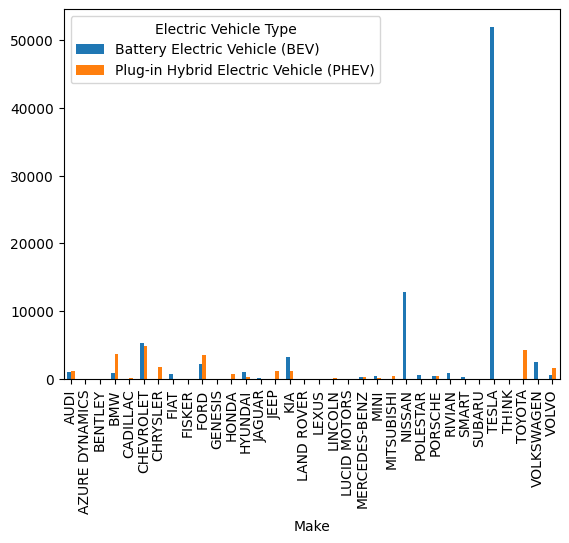

In [ ]:
pd.crosstab(index=df["Make"],columns=df["Electric Vehicle Type"]).plot(kind = "bar")
plt.show()

## Optional Step : Feature Engineering

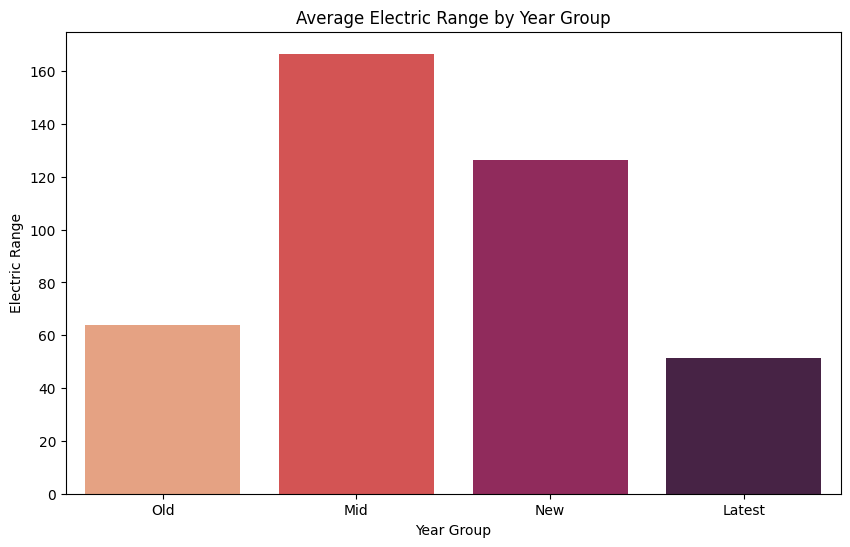

In [ ]:
# Feature 1: Price per Electric Mile
df['Price per Mile'] = df['Base MSRP'] / df['Electric Range']

# Feature 2: Binning Model Year into categories
bins = [1980, 2000, 2010, 2020, 2025]
labels = ['Old', 'Mid', 'New', 'Latest']
df['Year Group'] = pd.cut(df['Model Year'], bins=bins, labels=labels, right=False)

# Groupby Year Group and summarize MSRP and Electric Range
grouped_year = df.groupby('Year Group').agg({'Base MSRP': 'mean', 'Electric Range': 'mean'}).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Year Group', y='Electric Range', data=grouped_year, palette='rocket_r')
plt.title('Average Electric Range by Year Group')
plt.show()

# Feature 3: Create region feature from postal code (e.g., group by first digit or state)
df['Region'] = df['Postal Code'].str[0]  # Example: use the first digit of postal code as a proxy for region

## Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
ev_count_per_state = ev_df.groupby('State').size().reset_index(name='ev_count')
ev_count_per_state.head(10)

,State,ev_count
0,AK,1
1,AL,1
2,AR,4
3,AZ,6
4,CA,76
5,CO,9
6,CT,6
7,DC,6
8,DE,1
9,FL,6


In [ ]:
fig = px.choropleth(ev_count_per_state,
                    locations='State',  # Column representing state locations
                    locationmode="USA-states",  # Use USA state-level mapping
                    color='ev_count',  # Column representing the count of EVs
                    scope="usa",  # Focus the map on the USA
                    color_continuous_scale="Viridis",  # Color scale
                    title='Number of EV Vehicles by State')

fig.show()

In [ ]:
try:
  fig.write_image("choropleth_map.png")
  print("File saved.")
except Exception as e:
  print(f"An error occurred: {e}")

An error occurred: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido



## Create a Racing Bar Plot to display the animation of EV Make and its count each year.

In [ ]:
!pip install bar_chart_race

In [ ]:
import bar_chart_race as bcr

In [ ]:
make_counts_per_year = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

pivot_df = make_counts_per_year.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

# bcr.bar_chart_race(df=pivot_df,
#                    title='Electric Vehicles Make Count Over Time',

#                     n_bars=10,

#                    period_length=1000,
# )

In [ ]:
# Create the bar chart race with color effects
bcr.bar_chart_race(
    df=pivot_df,
    title='Electric Vehicles Make Count Over Time',
    n_bars=10,                    # Top 10 bars to display
    period_length=1000,            # Speed of the race (1000 ms = 1 second per frame)
    fixed_order=False,             # Let the order of bars change as they race
    fixed_max=False,               # Allow the bar lengths to change dynamically
    steps_per_period=30,           # Smoother transitions between frames
    interpolate_period=False,      # No interpolation between frames for cleaner transitions
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},  # Customize the period label
    bar_label_size=7,              # Label size for the bars
    tick_label_size=8,             # Size for the tick labels
    figsize=(6, 4),                # Size of the chart
    dpi=144,                       # DPI for higher resolution
    # cmap='viridis'                 # You can also add colormap for gradient effect
)